In [36]:
import praw
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
reddit = praw.Reddit(client_id='', client_secret='', user_agent='')

In [27]:
subreddit_name = 'Palestine'
subreddit = reddit.subreddit(subreddit_name)

In [28]:
try:
    top_post = next(subreddit.top())
    post_id = top_post.id
    post = reddit.submission(id=post_id)
except StopIteration:
    print(f"No top posts found in the subreddit {subreddit_name}")
except praw.exceptions.PRAWException as e:
    print(f"An error occurred: {e}")
    post = None


In [31]:
if post:
    # Create a list to store comments
    comments_list = []

    # Iterate over top-level comments and their replies
    for top_level_comment in post.comments:
        if isinstance(top_level_comment, praw.models.Comment):
            # Store comment details in a dictionary
            comment_info = {
                'Author': top_level_comment.author,
                'Body': top_level_comment.body,
                'Score': top_level_comment.score,
                'Created_utc': top_level_comment.created_utc
            }
            comments_list.append(comment_info)
    comments_df = pd.DataFrame(comments_list)

    # Sort the DataFrame by the 'Score' column in descending order
    comments_df = comments_df.sort_values(by='Score', ascending=False)

    # Display the DataFrame
    print(comments_df)


                   Author                                               Body  \
0          MetallicMarker  I’m Jewish.  I support Palestinian human right...   
1         inspired2create  He said “Palestinian human rights “ is that co...   
5                    None                                          [removed]   
2           heechulspetal  Those people screaming at him, calling him a t...   
4                 Iqiaruz  Wow that backlash is eminating a pure vibe of ...   
..                    ...                                                ...   
112                  None                                          [removed]   
111                  None                                          [removed]   
110  Agreeable-Witness800                                   long live israel   
114              mikebenb         Ask a Palastinian if Israeli lives matter.   
115    throwawayegyptians                             Is this Larry David? 😂   

     Score   Created_utc  
0      719  

In [33]:
comments_df.to_csv('Top-post-comments.csv',encoding='utf-8')

In [35]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\YAhia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
#sentiment analysis
sid = SentimentIntensityAnalyzer()
comments_df['Sentiment'] = comments_df['Body'].apply(lambda body: sid.polarity_scores(body)['compound'])

c:\Users\YAhia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


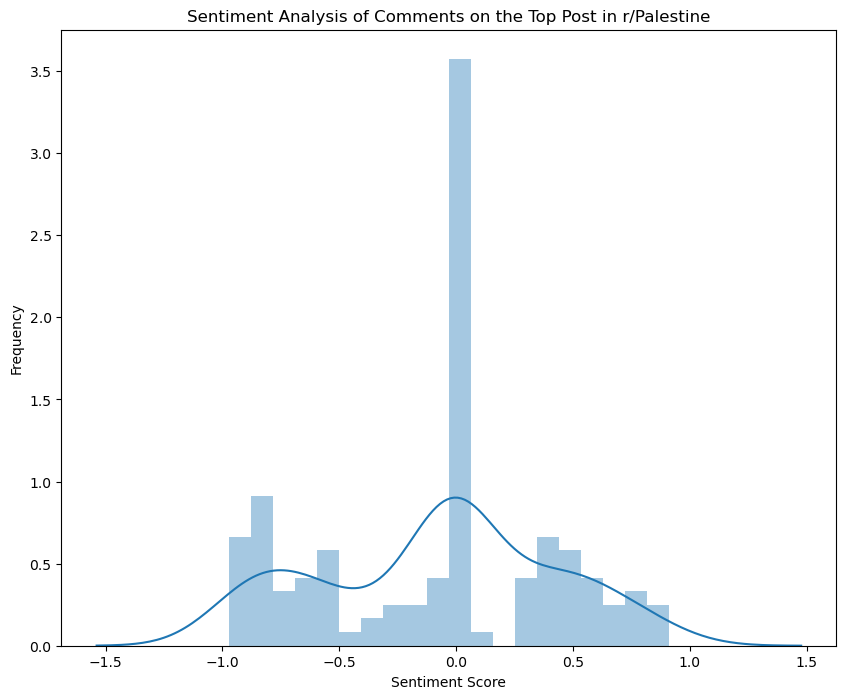

In [38]:
#visualize results
plt.figure(figsize=(10,8))
sns.distplot(comments_df['Sentiment'], bins=20)
plt.title(f'Sentiment Analysis of Comments on the Top Post in r/{subreddit_name}')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

c:\Users\YAhia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


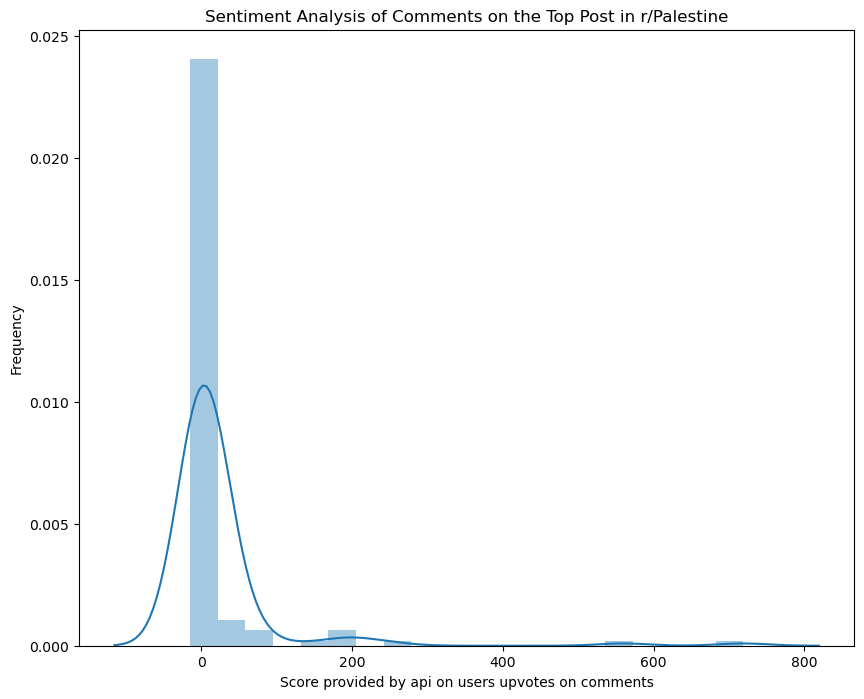

In [40]:
#visualize score from comments
plt.figure(figsize=(10,8))
sns.distplot(comments_df['Score'], bins=20)
plt.title(f'Sentiment Analysis of Comments on the Top Post in r/{subreddit_name}')
plt.xlabel('Score provided by api on users upvotes on comments')
plt.ylabel('Frequency')
plt.show()

In [ ]:
"""Conclusion: nlp algorithms aren't perfect, as we can see a totally biased subreddit got a negative score on nlp analysis even though it is of people only supporting Palestine because of inhuman circumstances in Gaza.
NLP doesn't give the true impression of people towards the post rather it only extracts emotions and reactions from text"""